Usuń obserwacje zawierające wartości odstające ze zbioru w pilku `glass.csv`. 
* Opcja 1: usuń wszystkie obserwacje zawierające wartości z $|Z| > 3$. Wskazówka: aby obliczyć $Z$-score dla wielu kolumn numerycznych jednocześnie można zastsować metodę `apply`.
* Opcja 2: usuń wszystkie obserwacje, w których co najmniej dwie wartości są poza zakresem $[Q_1 - 1.5(Q_3 - Q_1), Q_3 + 1.5(Q_3 - Q_1)]$

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('../data/glass.csv')
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
# Z score normalization
def z_score(x):
    return (x - x.mean()) / x.std()

In [8]:
df_z = df.apply(z_score)
df_z.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.870826,0.284287,1.251704,-0.690822,-1.124446,-0.670134,-0.145425,-0.352051,-0.585079,-0.84629
1,-0.248750,0.590433,0.634680,-0.170061,0.102080,-0.026152,-0.791877,-0.352051,-0.585079,-0.84629
2,-0.719631,0.149582,0.600016,0.190465,0.437760,-0.164148,-0.827010,-0.352051,-0.585079,-0.84629
3,-0.232286,-0.242285,0.697076,-0.310266,-0.052850,0.111844,-0.517838,-0.352051,-0.585079,-0.84629
4,-0.311315,-0.168810,0.648546,-0.410413,0.553957,0.081178,-0.623237,-0.352051,-0.585079,-0.84629


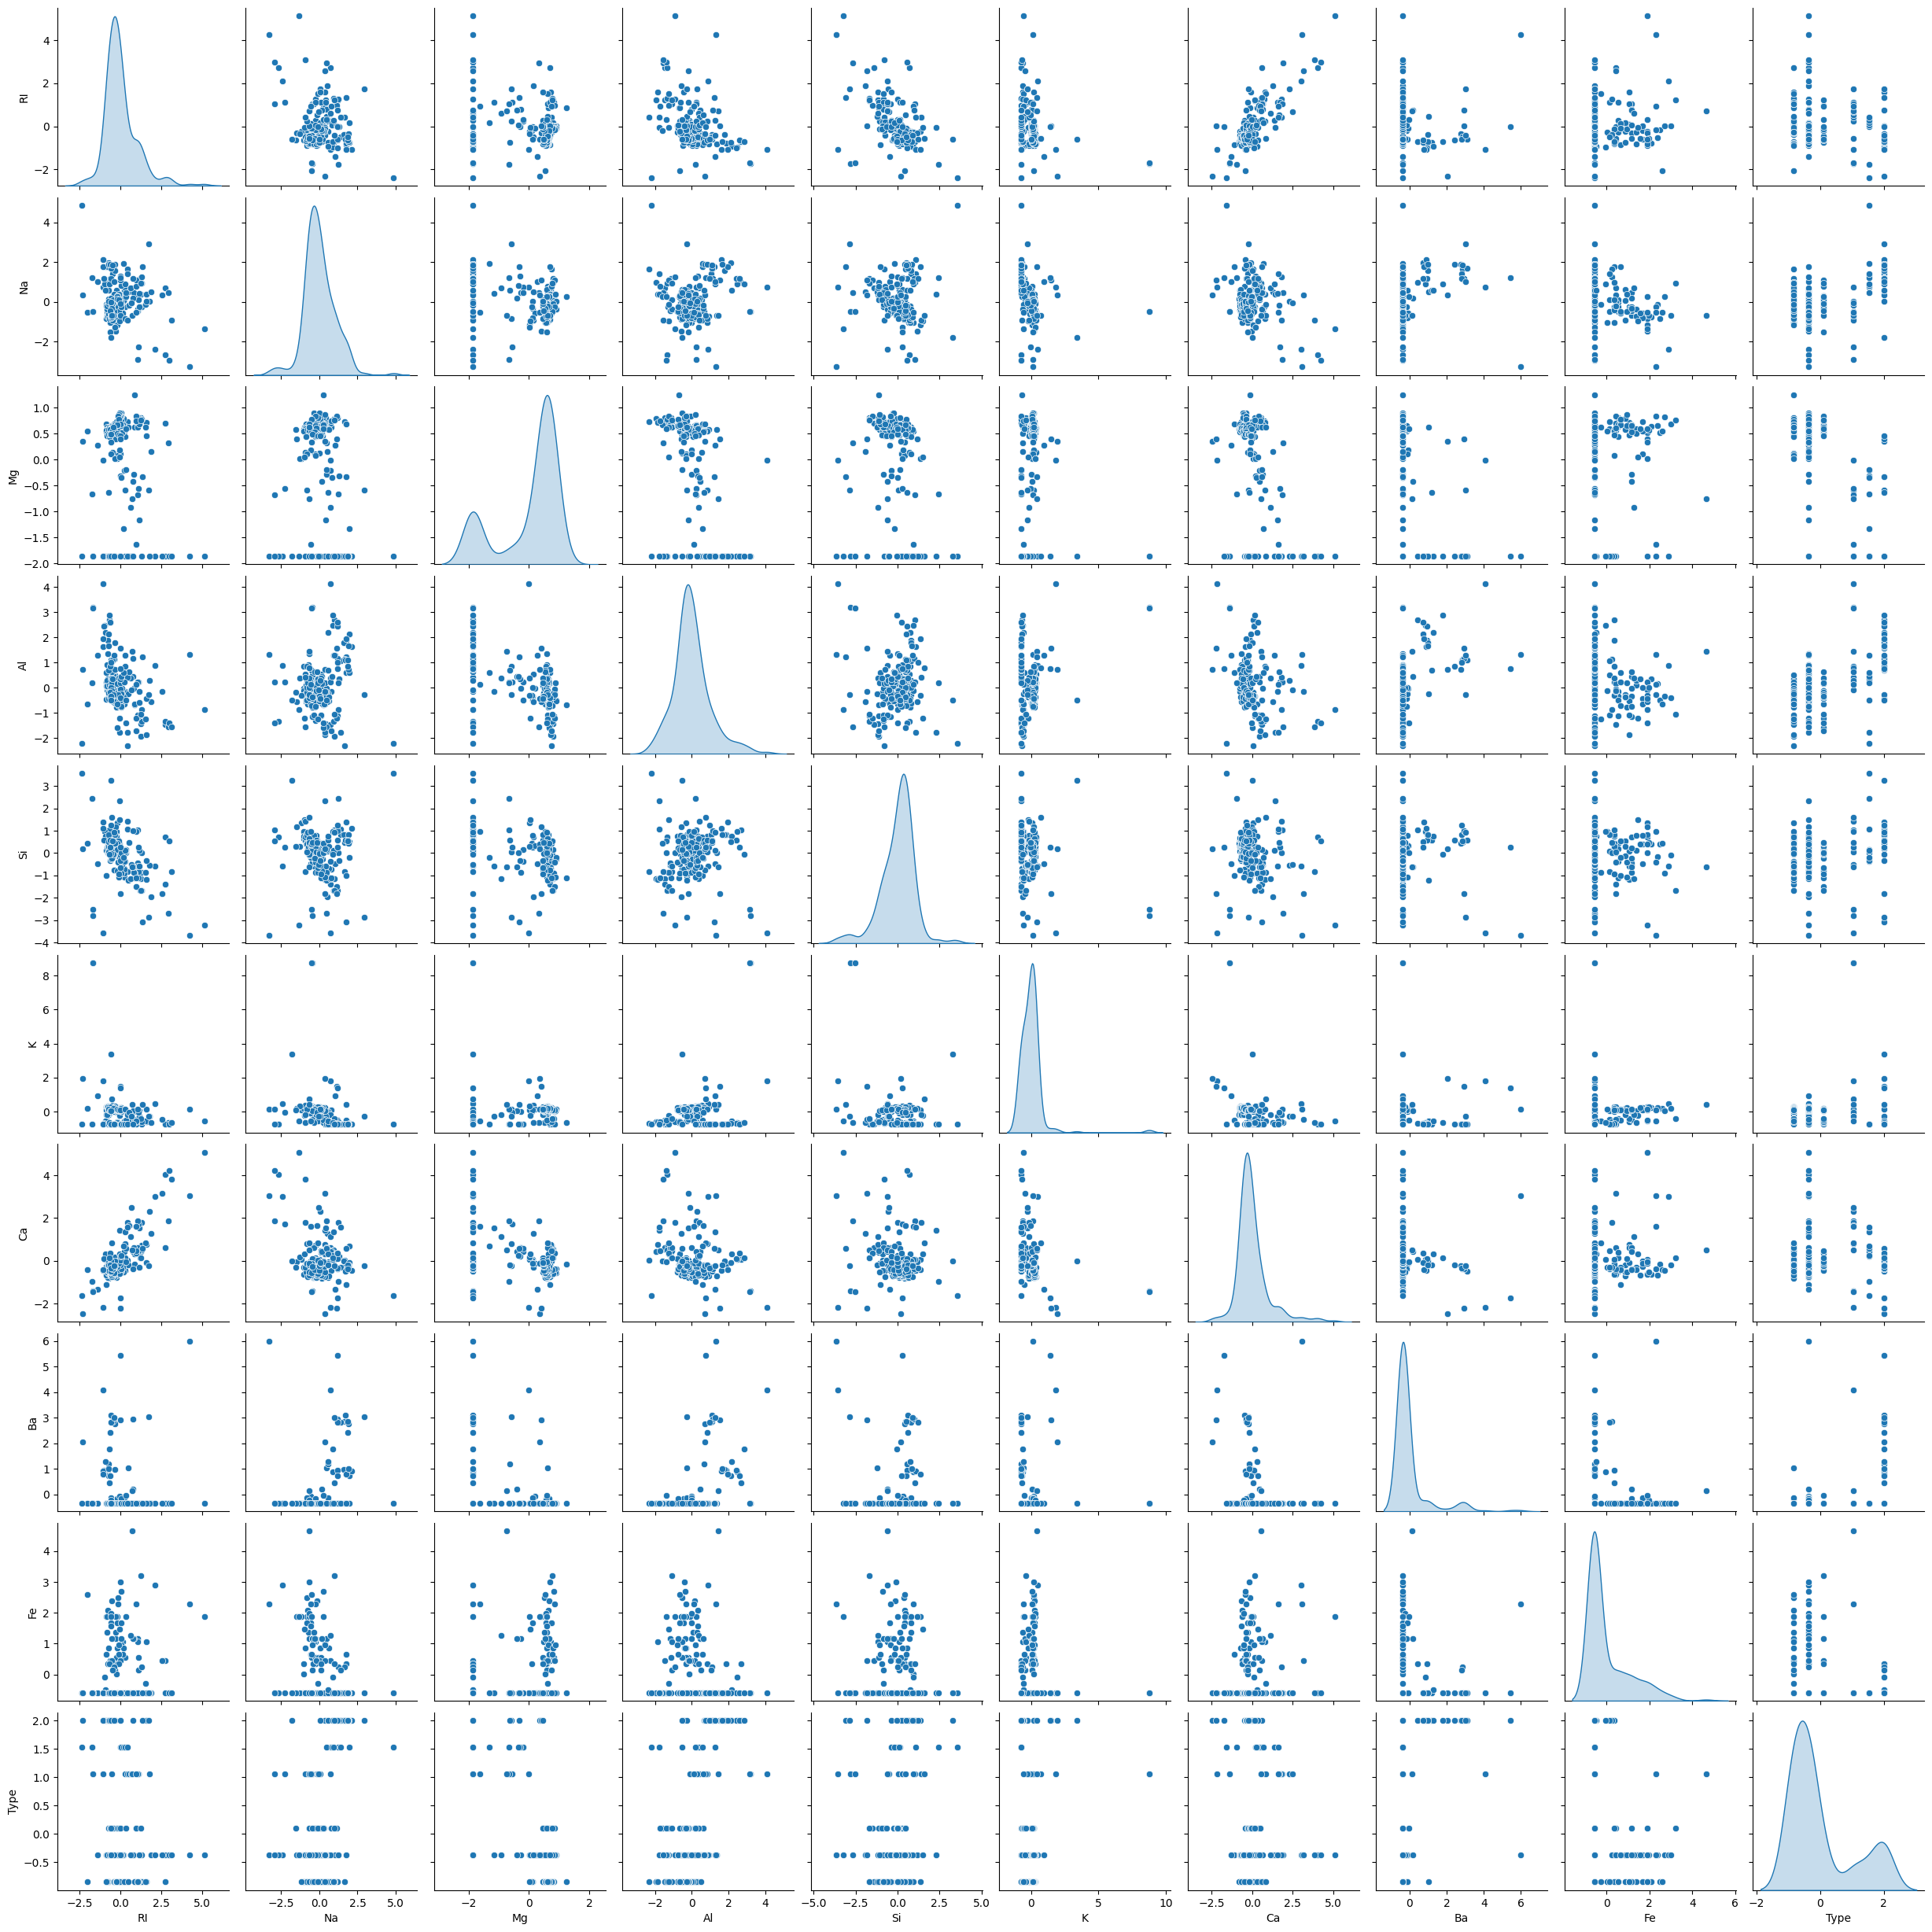

In [16]:
sns.pairplot(df_z, diag_kind='kde')
plt.show()

In [9]:
# Remove outliers 
df_z_filtered = df_z[(df_z < 3).all(axis=1)]
df_z_filtered.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,0.870826,0.284287,1.251704,-0.690822,-1.124446,-0.670134,-0.145425,-0.352051,-0.585079,-0.84629
1,-0.248750,0.590433,0.634680,-0.170061,0.102080,-0.026152,-0.791877,-0.352051,-0.585079,-0.84629
2,-0.719631,0.149582,0.600016,0.190465,0.437760,-0.164148,-0.827010,-0.352051,-0.585079,-0.84629
3,-0.232286,-0.242285,0.697076,-0.310266,-0.052850,0.111844,-0.517838,-0.352051,-0.585079,-0.84629
4,-0.311315,-0.168810,0.648546,-0.410413,0.553957,0.081178,-0.623237,-0.352051,-0.585079,-0.84629


In [10]:
df_z_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 195 entries, 0 to 212
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      195 non-null    float64
 1   Na      195 non-null    float64
 2   Mg      195 non-null    float64
 3   Al      195 non-null    float64
 4   Si      195 non-null    float64
 5   K       195 non-null    float64
 6   Ca      195 non-null    float64
 7   Ba      195 non-null    float64
 8   Fe      195 non-null    float64
 9   Type    195 non-null    float64
dtypes: float64(10)
memory usage: 16.8 KB


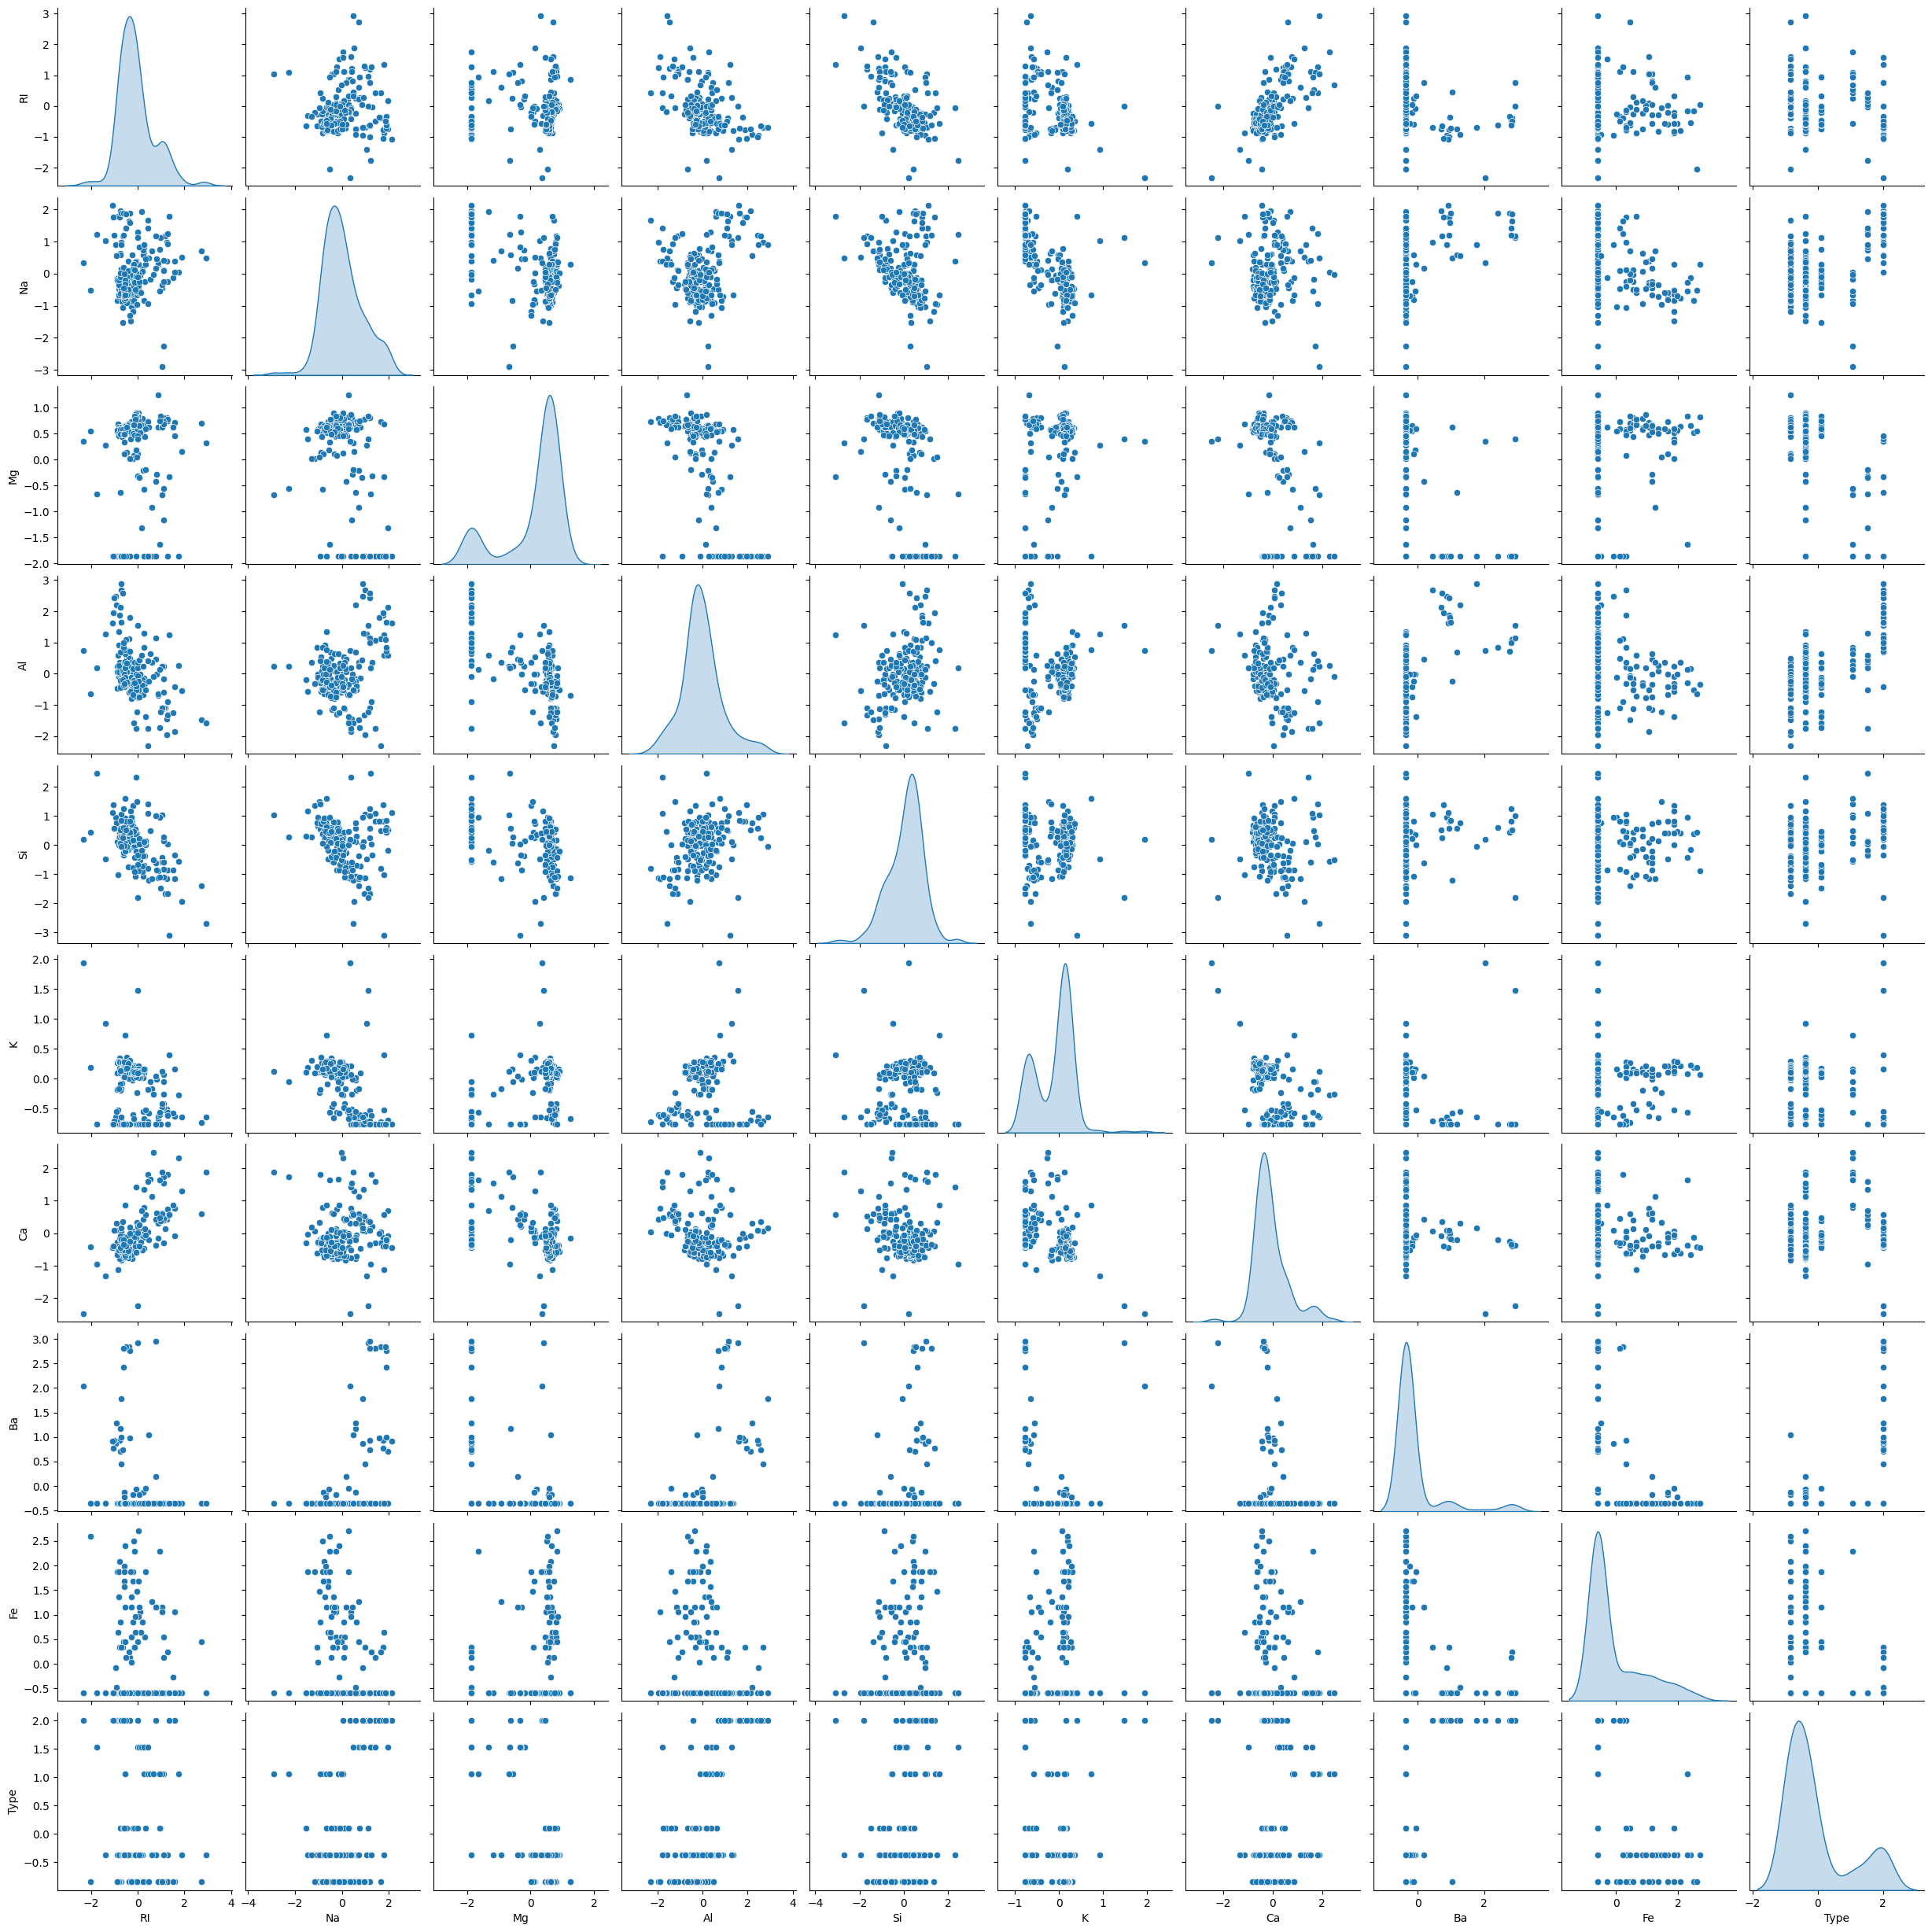

In [11]:
sns.pairplot(df_z_filtered, diag_kind='kde')
plt.show()